In [6]:
    # Save my code to Google drive
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import regex as re
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
#Import the MID.xlsx dataset
df = pd.read_excel("/content/MID.xlsx")

In [ ]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#First 5 records
df.head()

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,Haloperidol (0.5mg),Andol 0.5mg Tablet can also be used for treati...,"\n \n \nul \""\""\n\n \n 0\n\n \n Schiz...",\n \n Schizophrenia \n \n Schizophrenia is ...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol 0.5mg Tablet is a typical antipsychotic....,\n \n Andol 0.5mg Tablet helps treat schizop...,"\nAlcohol\n,\nAndol 0.5mg Tablet may cause exc...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,Bevacizumab (100mg),"\np dir=\""ltr\"" style=\""line-height: 1.38; mar...","\n \n \nul \""\""\n\n \n 0\n\n \n Cance...",\n \n Cancer of colon and rectum \n \n Canc...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti-angiogenic m...,\n \n Avastin 100mg Injection is an effectiv...,"\nAlcohol\n,\nIt is not known whether it is sa...",Monoclonal antibody (mAb),No,ANTI NEOPLASTICS,Vascular endothelial growth factor (VEGF) in...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Darbepoetin alfa (40mcg),Actorise 40 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 40 Injection is an erythropoiesis-sti...,\n \n Actorise 40 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Darbepoetin alfa (25mcg),Actorise 25 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 25 Injection is an erythropoiesis-sti...,\n \n Actorise 25 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,Darbepoetin alfa (60mcg),Actorise 60 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 60 Injection is an erythropoiesis-sti...,\n \n Actorise 60 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA


Exploratory Data Analysis

In [ ]:
df.shape

(192807, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192807 entries, 0 to 192806
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 192807 non-null  object
 1   Link                 192807 non-null  object
 2   Contains             192807 non-null  object
 3   ProductIntroduction  180821 non-null  object
 4   ProductUses          192807 non-null  object
 5   ProductBenefits      192807 non-null  object
 6   SideEffect           192807 non-null  object
 7   HowToUse             192712 non-null  object
 8   HowWorks             192571 non-null  object
 9   QuickTips            192807 non-null  object
 10  SafetyAdvice         192807 non-null  object
 11  Chemical_Class       101473 non-null  object
 12  Habit_Forming        192807 non-null  object
 13  Therapeutic_Class    192807 non-null  object
 14  Action_Class         85690 non-null   object
dtypes: object(15)
memory usage: 22.1+ 

In [ ]:
df.describe(include= "all")

NameError: name 'df' is not defined

In [ ]:
#Check for  % of null values
df.isnull().sum()/df.shape[0] *100


,0
Name,0.000000
Link,0.000000
Contains,0.000000
ProductIntroduction,6.216579
ProductUses,0.000000
ProductBenefits,0.000000
SideEffect,0.000000
HowToUse,0.049272
HowWorks,0.122402
QuickTips,0.000000


<Axes: xlabel='Therapeutic_Class'>

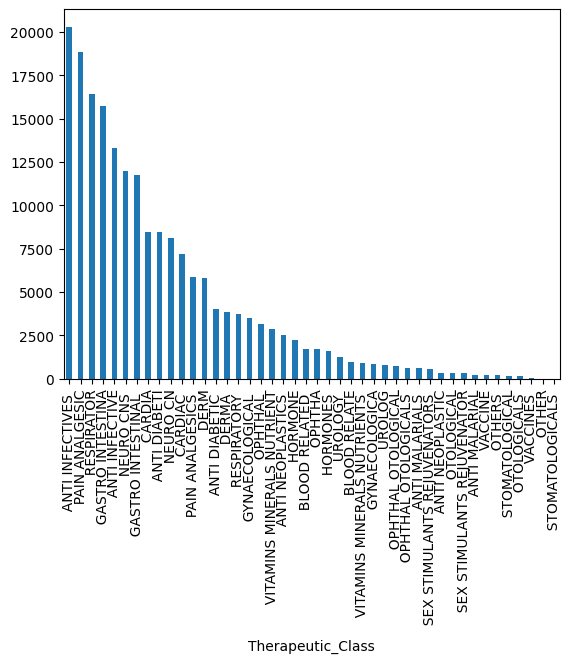

In [ ]:
#Class Distribution for each Therapuetic Class
df['Therapeutic_Class'].value_counts().plot(kind = "bar")

In [ ]:
#check how many Action_Classes we have
df["Action_Class"].nunique()

405

<Axes: xlabel='Action_Class'>

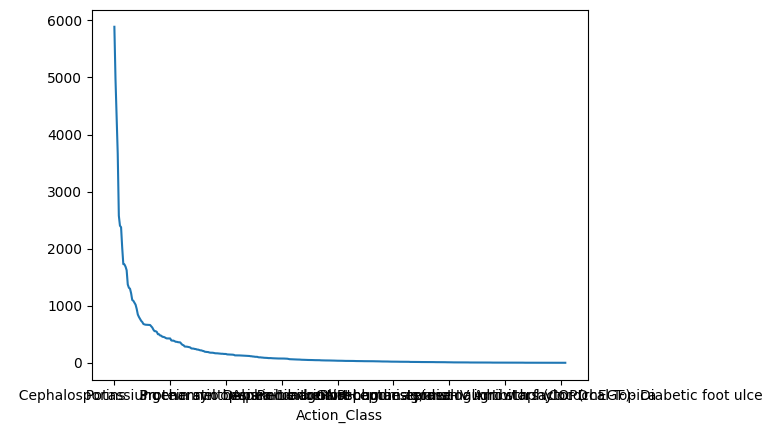

In [ ]:
df["Action_Class"].value_counts().plot()

Find most common Words in ProductIntroduction

In [ ]:
# Combine all text into a single string
all_text = ' '.join(df["ProductIntroduction"].fillna('').astype(str).values)

# Convert to lowercase
all_text = all_text.lower()

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
all_text = all_text.translate(translator)

# Tokenize
tokens = word_tokenize(all_text)

# Remove stopwords (like "and", "is", "the", etc.)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]


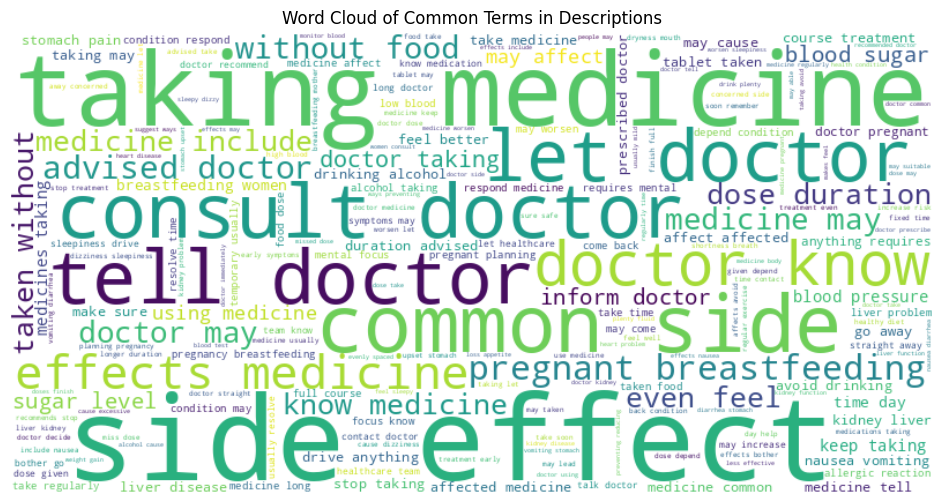

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Terms in Descriptions")
plt.show()


/tmp/ipython-input-22-2150585600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freq), y=list(word), palette="magma")


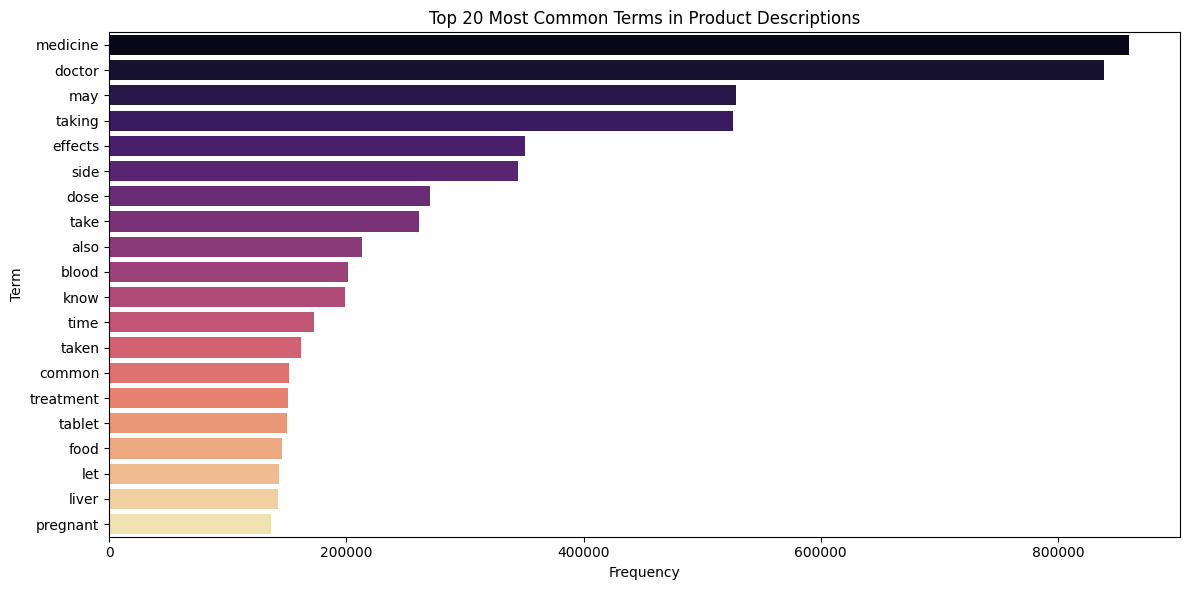

In [ ]:
# Count word frequencies
word_counts = Counter(tokens).most_common(20)
word, freq = zip(*word_counts)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(freq), y=list(word), palette="magma")
plt.title("Top 20 Most Common Terms in Product Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

In [ ]:
#Look For Duplicated Entries:
df[df.duplicated(subset = "Name")]


,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
31,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,Bevacizumab (100mg),"\np dir=\""ltr\"" style=\""line-height: 1.38; mar...","\n \n \nul \""\""\n\n \n 0\n\n \n Cance...",\n \n Cancer of colon and rectum \n \n Canc...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti-angiogenic m...,\n \n Avastin 100mg Injection is an effectiv...,"\nAlcohol\n,\nIt is not known whether it is sa...",Monoclonal antibody (mAb),No,ANTI NEOPLASTICS,Vascular endothelial growth factor (VEGF) in...
32,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Darbepoetin alfa (40mcg),Actorise 40 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 40 Injection is an erythropoiesis-sti...,\n \n Actorise 40 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
33,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Darbepoetin alfa (25mcg),Actorise 25 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 25 Injection is an erythropoiesis-sti...,\n \n Actorise 25 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
34,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,Darbepoetin alfa (60mcg),Actorise 60 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 60 Injection is an erythropoiesis-sti...,\n \n Actorise 60 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
35,Azel 80 Capsule,https://www.1mg.com/drugs/azel-80-capsule-682932,Enzalutamide (80mg),\n Azel 80 Capsule should be taken with or wi...,"\n \n \nul \""\""\n\n \n 0\n\n \n Prost...",\n \n Prostate cancer \n \n Prostate gland ...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Azel 80 Capsule is an antiandrogens. It works ...,\n \n You have been prescribed Azel 80 Capsu...,"\nAlcohol\n,\nIt is unsafe to consume alcohol ...",Phenylimidazolidine Derivative,No,ANTI NEOPLASTIC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192761,Zipant 40 Tablet,https://www.1mg.com/drugs/zipant-40-tablet-759275,Pantoprazole (40mg),Zipant 40 Tablet is also used to prevent stoma...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Heartburn \n \n Heartbur...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Zipant 40 Tablet is a proton pump inhibitor (P...,\n \n Zipant 40 Tablet should be taken 1 hou...,"\nAlcohol\n,\nIt is unsafe to consume alcohol ...",Sulfinylbenzimidazole Derivative,No,GASTRO INTESTINAL,Proton pump inhibitor
192765,Zukanorm M 1000 Tablet,https://www.1mg.com/drugs/zukanorm-m-1000-tabl...,Metformin (1000mg)+ Vildagliptin (50mg),Zukanorm M 1000 Tablet can be prescribed alone...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Type 2 diabetes mellitus ...,Most side effects do not require any medical a...,Take this medi

Clean the Data(Strings)

In [11]:
df.drop(columns = "Link", inplace=True)

In [10]:
# Fill missing values with empty string
df[['Name', 'ProductUses', 'QuickTips', 'Chemical_Class']] = df[['Name', 'ProductUses', 'QuickTips', 'Chemical_Class']].fillna('')
df['Therapeutic_Class'] = df['Therapeutic_Class'].fillna('Unknown')


In [12]:
import re
import numpy as np
from bs4 import BeautifulSoup

import re
import numpy as np
from bs4 import BeautifulSoup

def clean_text(text):
    if pd.isnull(text):
        return np.nan

    # Convert to string
    text = str(text)

    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Remove backslashes and unicode escape sequences
    text = re.sub(r'\\+', ' ', text)

    # 3. Remove CSS-style junk (e.g. 'margin top 0pt', 'font-size: 12pt', 'line-height', etc.)
    text = re.sub(r'\b(margin|padding|font|line|text|style|display|color|size|top|bottom|left|right)[\s:-]*\d*pt\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(span|pt|dir|ltr|class|align|center|none)\b', ' ', text, flags=re.IGNORECASE)

    # 4. Remove any remaining HTML-style attributes (e.g., dir="ltr")
    text = re.sub(r'\b\w+="[^"]*"', ' ', text)

    # 5. Remove numbers that are likely list markers
    text = re.sub(r'\b\d{1,2}\b', ' ', text)

    # 6. Remove any remaining non-alphanumeric characters except basic punctuation
    text = re.sub(r'[^\w\s.,]', ' ', text)

    # 7. Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


# Apply to all text columns
text_columns = df.select_dtypes(include='object').columns
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Optional: make lowercase
# df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())

In [13]:
df

,Name,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol .5mg Tablet,Haloperidol .5mg,Andol .5mg Tablet can also be used for treatin...,n n ul n n Schizophrenia n n n,Schizophrenia Schizophrenia is a mental disord...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol .5mg Tablet is a typical antipsychotic. ...,Andol .5mg Tablet helps treat schizophrenia. I...,"Alcohol , Andol .5mg Tablet may cause excessiv...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,Bevacizumab 100mg,p style line height . margin margin style font...,n n ul n n Cancer of colon and rectum n n n No...,Cancer of colon and rectum Cancer of the colon...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti angiogenic m...,"Avastin 100mg Injection is an effective, first...","Alcohol , It is not known whether it is safe t...",Monoclonal antibody mAb,No,ANTI NEOPLASTICS,Vascular endothelial growth factor VEGF inhibitor
2,Actorise Injection,Darbepoetin alfa 40mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
3,Actorise Injection,Darbepoetin alfa 25mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
4,Actorise Injection,Darbepoetin alfa 60mcg,Actorise Injection is a medicine that needs to...,n n ul n n Treatment of Anemia due to chronic ...,Treatment of Anemia due to chronic kidney dise...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise Injection is an erythropoiesis stimul...,Actorise Injection helps in the treatment of a...,"Alcohol , It is not known whether it is safe t...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis stimulating agent ESA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192802,Zedoxy 200 Tablet,Cefpodoxime Proxetil 200mg,Zedoxy 200 Tablet should be taken with food. Y...,n n ul n n Treatment of Bacterial infections n...,Treatment of Bacterial infections Zedoxy 200 T...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Zedoxy 200 Tablet is an antibiotic. It kills t...,Your doctor has prescribed Zedoxy 200 Tablet t...,"Alcohol , Consuming alcohol with Zedoxy 200 Ta...",Broad Spectrum Third fourth generation cephalo...,No,ANTI INFECTIVES,Cephalosporins generatio
192803,Zonticin Eye Ear Drop,Gentamicin . w v,Zonticin Eye Ear Drop fights the infection by ...,n n ul n n Treatment of Bacterial eye infectio...,Treatment of Bacterial eye infections Zonticin...,Most side effects do not require any medical a...,This medicine is for external use only. Use it...,Zonticin Eye Ear Drop is an antibiotic. It sto...,You have been prescribed Zonticin Eye Ear Drop...,"Alcohol , No interaction found established,ima...",Aminoglycosides,No,OPHTHAL OTOLOGICALS,Aminoglycoside
192804,Zenoxa OD 900 Tablet SR,Oxcarbazepine 900mg,Zenoxa OD 900 Tablet SR may be used alon

Text Classification

In [14]:
# We will use Name , ProductUses, QuickTips, and Chemical Class to predict the Therapuetic class of a drug

# Concatenate the text features into a single input feature
df['text'] = (
    df['Name'] + ' ' +
    df['ProductUses'] + ' ' +
    df['QuickTips'] + ' ' +
    df['Chemical_Class']
)


In [53]:
#Encode Labels:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Therapeutic_Class'])


In [ ]:
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))


In [ ]:
class_mapping

{'ANTI DIABETI': 0,
 'ANTI DIABETIC': 1,
 'ANTI INFECTIVE': 2,
 'ANTI INFECTIVES': 3,
 'ANTI MALARIAL': 4,
 'ANTI MALARIALS': 5,
 'ANTI NEOPLASTIC': 6,
 'ANTI NEOPLASTICS': 7,
 'BLOOD RELATE': 8,
 'BLOOD RELATED': 9,
 'CARDIA': 10,
 'CARDIAC': 11,
 'DERM': 12,
 'DERMA': 13,
 'GASTRO INTESTINA': 14,
 'GASTRO INTESTINAL': 15,
 'GYNAECOLOGICA': 16,
 'GYNAECOLOGICAL': 17,
 'HORMONE': 18,
 'HORMONES': 19,
 'NEURO CN': 20,
 'NEURO CNS': 21,
 'OPHTHA': 22,
 'OPHTHAL': 23,
 'OPHTHAL OTOLOGICAL': 24,
 'OPHTHAL OTOLOGICALS': 25,
 'OTHER': 26,
 'OTHERS': 27,
 'OTOLOGICAL': 28,
 'OTOLOGICALS': 29,
 'PAIN ANALGESIC': 30,
 'PAIN ANALGESICS': 31,
 'RESPIRATOR': 32,
 'RESPIRATORY': 33,
 'SEX STIMULANTS REJUVENATOR': 34,
 'SEX STIMULANTS REJUVENATORS': 35,
 'STOMATOLOGICAL': 36,
 'STOMATOLOGICALS': 37,
 'UROLOG': 38,
 'UROLOGY': 39,
 'VACCINE': 40,
 'VACCINES': 41,
 'VITAMINS MINERALS NUTRIENT': 42,
 'VITAMINS MINERALS NUTRIENTS': 43}

In [54]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Change text into numbers that computers can work with.
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
#Train a logistic regressoin model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Models Perfomance

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9787874072921529
Classification Report:
                              precision    recall  f1-score   support

               ANTI DIABETI       1.00      0.99      1.00      1693
              ANTI DIABETIC       0.99      1.00      1.00       810
             ANTI INFECTIVE       0.98      0.98      0.98      2667
            ANTI INFECTIVES       0.98      0.99      0.98      4058
              ANTI MALARIAL       1.00      0.87      0.93        47
             ANTI MALARIALS       0.99      1.00      1.00       122
            ANTI NEOPLASTIC       0.95      0.88      0.92        68
           ANTI NEOPLASTICS       0.98      0.98      0.98       507
               BLOOD RELATE       0.96      0.96      0.96       197
              BLOOD RELATED       0.97      0.99      0.98       349
                     CARDIA       1.00      0.99      0.99      1697
                    CARDIAC       0.98      0.99      0.99      1438
                       DERM       0.96      0.92 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


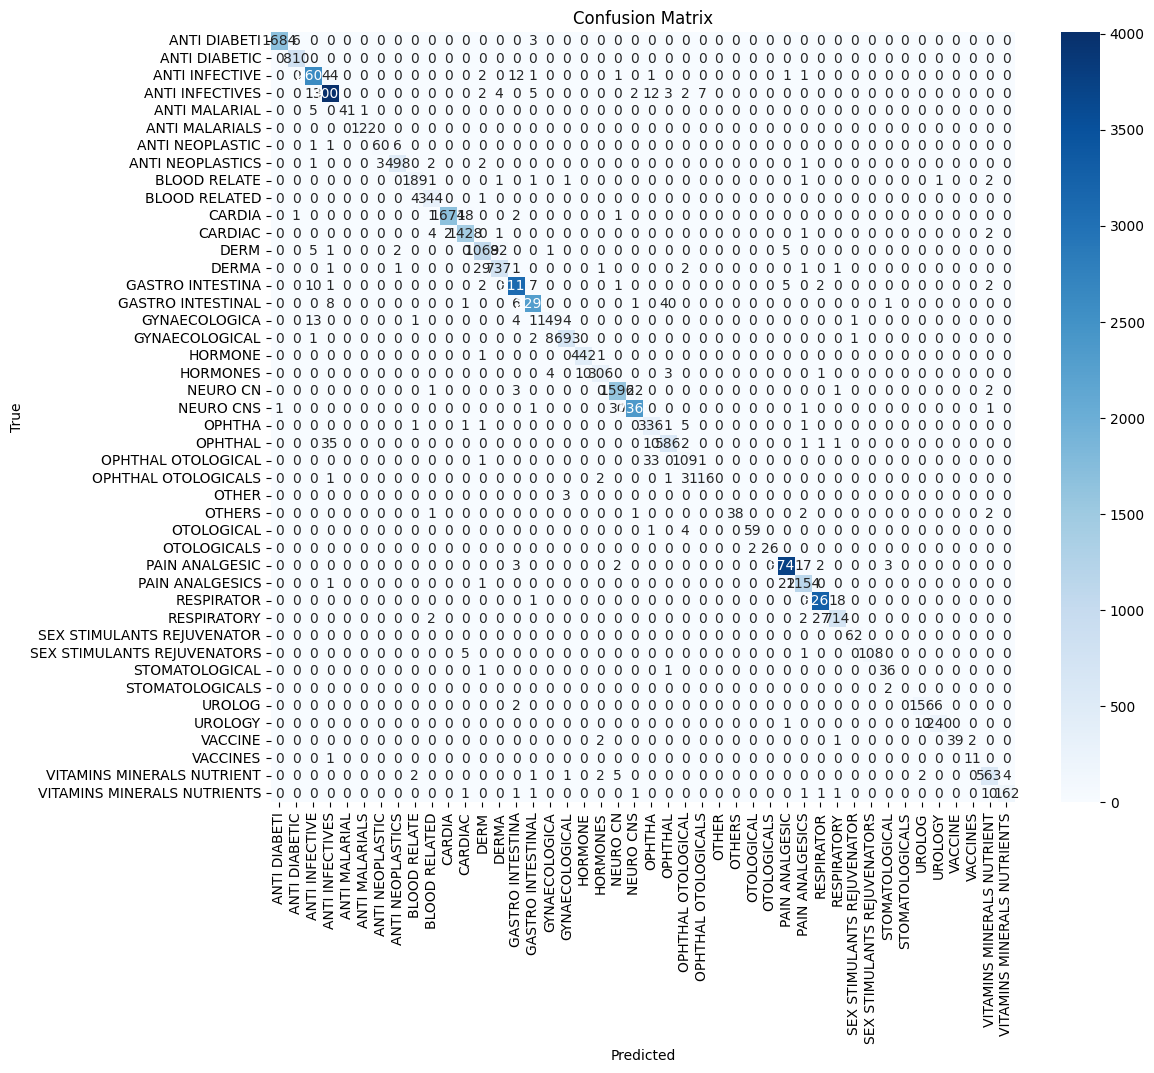

In [ ]:
#Visualize our confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Test Other ML Models(RandomForestClassifier, SVC, XGDBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_preds = xgb_model.predict(X_test_tfidf)
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Train and evaluate SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)
svm_report = classification_report(y_test, svm_preds, output_dict=True)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Create a summary DataFrame
results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [rf_accuracy, xgb_accuracy, svm_accuracy]
})

results_summary


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy
0,Random Forest,0.990846
1,XGBoost,0.991157
2,SVM,0.984389


Multimodal Deep Learning with Transformer + Tabular Fusion:

We will use Name, ProductUses, QuickTips, Chemical_Class, Therapuetic_Class(Target)


In [ ]:
df[df["Therapeutic_Class"].isnull()] # All records have Therapuetic_Class

,Name,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class,text,label


In [15]:
# Load Tokenizer
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [16]:
# Tokenize with truncation and padding
text_encodings = tokenizer(
    df["text"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"  # PyTorch format; use tf for TensorFlow
)


In [17]:
text_encodings

{'input_ids': tensor([[  101,  1998,  4747,  ...,  1998,  2504,   102],
        [  101, 10927, 16643,  ...,  2009,  2064,   102],
        [  101,  3364,  5562,  ..., 25117,  2015,   102],
        ...,
        [  101, 16729, 11636,  ...,  1997,  2659,   102],
        [  101,  1062,  4221,  ...,     0,     0,     0],
        [  101,  1062,  8516,  ...,  1996,  2034,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}

Encode Tabular + Target Variables

In [26]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [30]:
import torch

In [31]:
from sklearn.preprocessing import LabelEncoder

chem_encoder = LabelEncoder()
chemical_encoded = chem_encoder.fit_transform(df["Chemical_Class"])
chemical_encoded = torch.tensor(chemical_encoded).unsqueeze(1).float()  # shape: (N, 1)



In [32]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df["Therapeutic_Class"])
labels = torch.tensor(labels)



In [33]:
labels

tensor([21,  7,  9,  ..., 21, 10, 20])

In [35]:
from torch.utils.data import Dataset

class DrugDataset(Dataset):
    def __init__(self, encodings, tabular, labels):
        self.encodings = encodings
        self.tabular = tabular
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "tabular": self.tabular[idx],
            "labels": self.labels[idx]
        }

dataset = DrugDataset(text_encodings, chemical_encoded, labels)


In [36]:
from torch.utils.data import random_split, DataLoader

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [38]:
import torch
import torch.nn as nn
from transformers import AutoModel

class MultimodalTransformerTabularModel(nn.Module):
    def __init__(self, num_tabular_features, num_classes):
        super(MultimodalTransformerTabularModel, self).__init__()

        # Load pretrained BERT
        self.bert = AutoModel.from_pretrained("bert-base-uncased")

        # Freeze BERT layers if needed
        # for param in self.bert.parameters():
        #     param.requires_grad = False

        # Tabular branch: simple feedforward layer
        self.tabular_net = nn.Sequential(
            nn.Linear(num_tabular_features, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32)
        )

        # Fusion layer
        self.classifier = nn.Sequential(
            nn.Linear(768 + 32, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, input_ids, attention_mask, tabular):
        # BERT text embedding
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = bert_output.last_hidden_state[:, 0, :]  # [CLS] token output (batch, 768)

        # Tabular forward pass
        tabular_output = self.tabular_net(tabular)  # (batch, 32)

        # Concatenate
        combined = torch.cat((cls_embedding, tabular_output), dim=1)  # (batch, 768+32)

        # Final classification
        logits = self.classifier(combined)
        return logits


In [39]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import get_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MultimodalTransformerTabularModel(num_tabular_features=1, num_classes=len(label_encoder.classes_))
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 5
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Define Training and Evaluation Loop

In [40]:
def train_epoch(model, dataloader, optimizer, criterion, scheduler):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        tabular = batch["tabular"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, tabular=tabular)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            tabular = batch["tabular"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, tabular=tabular)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(dataloader), accuracy


In [43]:
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, lr_scheduler)
    val_loss, val_accuracy = evaluate(model, val_loader, criterion)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")


Epoch 1/5
Train Loss: 0.0522
Val Loss: 0.0444 | Val Accuracy: 0.9866
Epoch 2/5
Train Loss: 0.0300
Val Loss: 0.0301 | Val Accuracy: 0.9908
Epoch 3/5
Train Loss: 0.0194
Val Loss: 0.0258 | Val Accuracy: 0.9925


KeyboardInterrupt: 

Lets Explore how each Feature Impacted Our Models Perfomance Usin\g LIME(Local Interpretable Model-agnostic Explanations)


In [ ]:
#For Text Inputs:

In [57]:
from lime.lime_text import LimeTextExplainer
import numpy as np

# Since your model uses BERT tokenization + tabular data,
# fix tabular input (e.g. chemical_encoded) to a constant value for explanation,
# and vary the text input for LIME

def predict_proba_text(texts):
    # texts: list of raw text strings
    model.eval()
    probs = []
    with torch.no_grad():
        for text in texts:
            # Tokenize text
            encodings = tokenizer(text,
                                  truncation=True,
                                  padding='max_length',
                                  max_length=128,
                                  return_tensors="pt")

            # Prepare fixed tabular input tensor (e.g., mean or specific example)
            fixed_tabular = chemical_encoded.mean(dim=0, keepdim=True).to(device)  # (1, num_features)

            input_ids = encodings['input_ids'].to(device)
            attention_mask = encodings['attention_mask'].to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask, tabular=fixed_tabular)
            prob = torch.softmax(logits, dim=1).cpu().numpy()
            probs.append(prob[0])
    return np.array(probs)

# Instantiate LimeTextExplainer
class_names = label_encoder.classes_.tolist()
explainer = LimeTextExplainer(class_names=class_names)

# Pick an instance to explain, e.g. first example
idx_to_explain = 0
text_instance = df['text'].iloc[idx_to_explain]

exp = explainer.explain_instance(
    text_instance,
    predict_proba_text,
    num_features=10
)

# Show explanation as list of (feature, weight)
print(exp.as_list())

# Or visualize
exp.show_in_notebook(text=True)


[(np.str_('Schizophrenia'), -0.0005339809031546882), (np.str_('schizophrenia'), -0.0005067647023701517), (np.str_('weight'), 0.00035451790061640003), (np.str_('gain'), 0.00021074415585795394), (np.str_('your'), -0.00018357628701079395), (np.str_('is'), -0.00017709768693292135), (np.str_('Derivative'), -0.00017063643597167166), (np.str_('ul'), -0.00015316942700082902), (np.str_('regulates'), -0.0001515172302798495), (np.str_('may'), 0.00012356760304272916)]


In [58]:
#For Tabular(Chemical Class) Data:

In [60]:
from lime.lime_tabular import LimeTabularExplainer

# Prepare tabular data as numpy array (chemical_encoded converted)
tabular_data = chemical_encoded.cpu().numpy()

# For LimeTabularExplainer, you need the original feature names:
tabular_feature_names = ['Chemical_Class_Encoded']  # your single feature here

explainer_tab = LimeTabularExplainer(
    tabular_data,
    feature_names=tabular_feature_names,
    class_names=class_names,
    discretize_continuous=True
)

# Prediction function for tabular input only, with fixed text input
def predict_proba_tabular(tabular_instances):
    model.eval()
    probs = []
    with torch.no_grad():
        for tab_inst in tabular_instances:
            # Fixed text input (example 0)
            encodings = tokenizer(df['text'].iloc[0],
                                  truncation=True,
                                  padding='max_length',
                                  max_length=128,
                                  return_tensors="pt")

            input_ids = encodings['input_ids'].to(device)
            attention_mask = encodings['attention_mask'].to(device)
            tab_tensor = torch.tensor(tab_inst).unsqueeze(0).float().to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask, tabular=tab_tensor)
            prob = torch.softmax(logits, dim=1).cpu().numpy()
            probs.append(prob[0])
    return np.array(probs)

# Pick an instance to explain
tab_instance = tabular_data[idx_to_explain]

exp_tab = explainer_tab.explain_instance(
    tab_instance,
    predict_proba_tabular,
    num_features=1
)

print(exp_tab.as_list())


#The Result shows that when the Chemical Class endcoding is in a range of (54 to 379) it has a negative effect(pushing away from the predicted class)

[('54.00 < Chemical_Class_Encoded <= 379.00', -1.785707080749844e-08)]


In [ ]:
'''
Overall our models did very well with an average accuracy score of 98%, I used the LIME to show how words affect the probability of a Therapuetic
Class being chosen. As for the Next Steps we could freeze some BERT layers, fine tune, use grid search cv to find optimal hyperparameters and also build a simple API t


